# Decision Tree

In [17]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [18]:
#X= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
#y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [19]:
X= np.array([[2,3], [-4,0], [1,1], [1,1], [-2,2], [2,7]])
y = np.array([4, 3, 3, 4, 3, 4])

In [20]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

In [21]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [22]:
predicted= model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


In [23]:
model.feature_importances_

array([0.75, 0.25])

In [24]:
df = pd.DataFrame(X)
df['label'] = y
df

,0,1,label
0,2,3,4
1,-4,0,3
2,1,1,3
3,1,1,4
4,-2,2,3
5,2,7,4


In [25]:
np.unique(y, return_counts=True)

(array([3, 4]), array([3, 3]))

In [26]:
1 - ( (3/6)**2 + (3/6)**2 )

0.5

In [27]:
def gini(group):
    values, counts = np.unique(group, return_counts=True)
    print('counts: {}'.format(counts))
    tot = np.sum(counts)
    sum_sq = 0
    for i in counts:
        sum_sq += (i/tot)**2
    return 1 - sum_sq

In [28]:
y

array([4, 3, 3, 4, 3, 4])

In [29]:
gini(y)

counts: [3 3]


0.5

In [30]:
df_ = df.sort_values(by=[0,1])
df_

,0,1,label
1,-4,0,3
4,-2,2,3
2,1,1,3
3,1,1,4
0,2,3,4
5,2,7,4


In [31]:
for i, v in enumerate(df_['label']):
    if i == 0:
        continue
    left = df_['label'][:i]
    gini_left = gini(left)
    right = df_['label'][i:]
    gini_right = gini(right)
    print('left:{}, right:{}'.format(gini_left, gini_right))

counts: [1]
counts: [2 3]
left:0.0, right:0.48
counts: [2]
counts: [1 3]
left:0.0, right:0.375
counts: [3]
counts: [3]
left:0.0, right:0.0
counts: [3 1]
counts: [2]
left:0.375, right:0.0
counts: [3 2]
counts: [1]
left:0.48, right:0.0


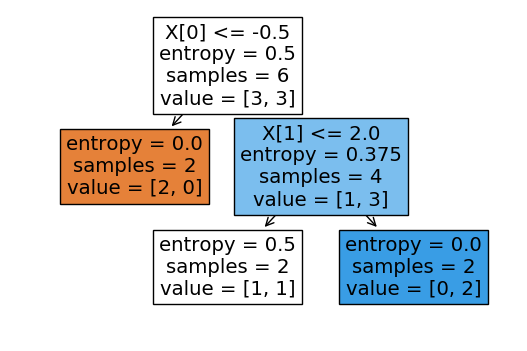

In [32]:
plt.figure(dpi=100)
tree.plot_tree(model, filled=True);

In [33]:
model.feature_importances_

array([0.75, 0.25])